In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:10<00:00, 18.6MB/s]
100% 163M/163M [00:10<00:00, 16.4MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2484.jpg', 'with_mask_265.jpg', 'with_mask_2705.jpg', 'with_mask_3201.jpg', 'with_mask_2916.jpg']
['with_mask_2275.jpg', 'with_mask_837.jpg', 'with_mask_87.jpg', 'with_mask_3367.jpg', 'with_mask_2695.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2644.jpg', 'without_mask_2086.jpg', 'without_mask_296.jpg', 'without_mask_939.jpg', 'without_mask_2838.jpg']
['without_mask_3617.jpg', 'without_mask_1633.jpg', 'without_mask_170.jpg', 'without_mask_79.jpg', 'without_mask_1954.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

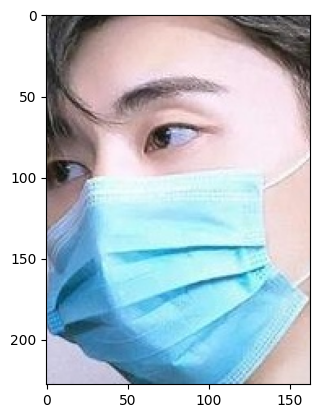

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

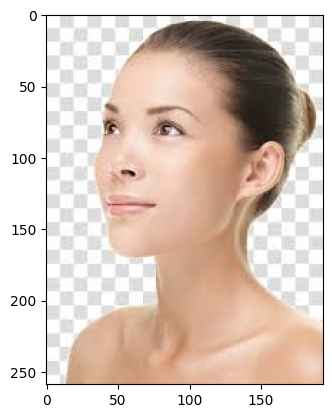

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       [[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       [[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       ...,

       [[204, 221, 223],
        [211, 228, 231],
        [213, 230, 232],
        ...,
        [126, 147, 142],
        [119, 140, 137],
        [144, 164, 165]],

       [[215, 228, 230],
        [213, 227, 229],
        [219, 233, 235],
        ...,
        [134, 154, 151],
        [127, 148, 146],
        [148, 171, 169]],

       [[221, 233, 233],
        [222, 233, 234],
        [219, 232, 232],
        ...,
        [140, 159, 159],
        [133, 155, 154],
        [156, 180, 177]]], dtype=uint8)
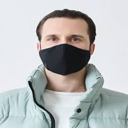

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[243, 243, 255],
        [246, 245, 255],
        [243, 240, 253],
        ...,
        [ 85,  70,  73],
        [ 87,  72,  75],
        [ 88,  73,  76]],

       [[244, 244, 255],
        [241, 241, 253],
        [228, 225, 238],
        ...,
        [ 90,  75,  78],
        [ 91,  76,  79],
        [ 93,  77,  80]],

       [[251, 250, 255],
        [224, 224, 236],
        [186, 185, 198],
        ...,
        [ 92,  79,  82],
        [ 90,  78,  80],
        [ 90,  77,  80]],

       ...,

       [[  8,   8,  20],
        [ 10,   9,  21],
        [ 11,  11,  23],
        ...,
        [ 12,  15,  22],
        [  7,  10,  17],
        [  2,   5,  12]],

       [[  6,   6,  18],
        [  9,   9,  21],
        [ 12,  12,  23],
        ...,
        [ 14,  17,  24],
        [  8,  11,  18],
        [  2,   5,  12]],

       [[  9,   9,  19],
        [  9,   9,  19],
        [  9,   9,  19],
        ...,
        [ 17,  20,  27],
        [ 11,  14,  21],
        [  5,   8,  15]]], dtype=uint8)
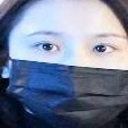

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.95294118, 0.95294118, 1.        ],
        [0.96470588, 0.96078431, 1.        ],
        [0.95294118, 0.94117647, 0.99215686],
        ...,
        [0.33333333, 0.2745098 , 0.28627451],
        [0.34117647, 0.28235294, 0.29411765],
        [0.34509804, 0.28627451, 0.29803922]],

       [[0.95686275, 0.95686275, 1.        ],
        [0.94509804, 0.94509804, 0.99215686],
        [0.89411765, 0.88235294, 0.93333333],
        ...,
        [0.35294118, 0.29411765, 0.30588235],
        [0.35686275, 0.29803922, 0.30980392],
        [0.36470588, 0.30196078, 0.31372549]],

       [[0.98431373, 0.98039216, 1.        ],
        [0.87843137, 0.87843137, 0.9254902 ],
        [0.72941176, 0.7254902 , 0.77647059],
        ...,
        [0.36078431, 0.30980392, 0.32156863],
        [0.35294118, 0.30588235, 0.31372549],
        [0.35294118, 0.30196078, 0.31372549]],

       ...,

       [[0.03137255, 0.03137255, 0.07843137],
        [0.03921569, 0.03529412, 0.08235294],
        [0.04313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [54]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.6))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [55]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [56]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - acc: 0.6894 - loss: 0.6892 - val_acc: 0.9074 - val_loss: 0.2487
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8797 - loss: 0.3128 - val_acc: 0.9041 - val_loss: 0.2106
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8890 - loss: 0.2662 - val_acc: 0.9289 - val_loss: 0.1972
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9040 - loss: 0.2336 - val_acc: 0.9388 - val_loss: 0.1770
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9270 - loss: 0.1927 - val_acc: 0.9306 - val_loss: 0.1852
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9358 - loss: 0.1799 - val_acc: 0.9174 - val_loss: 0.2330
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9445 - loss: 0.1440 - val_acc: 0.9355 - val_loss: 0.1807
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9360 - loss: 0.1605 - val_acc: 0.9388 - val_loss: 0.1715
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms

**Model Evaluation**

In [57]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9204 - loss: 0.2415
Test Accuracy = 0.9285241365432739


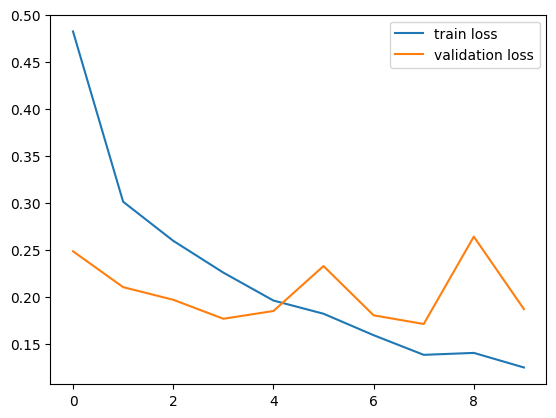

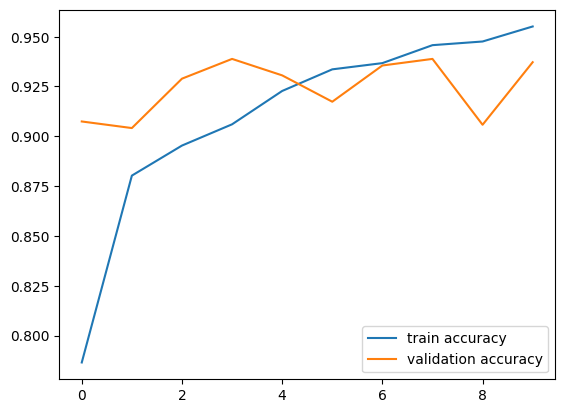

In [58]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1004.jpg


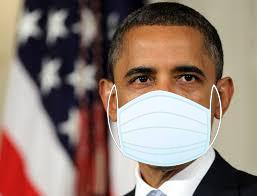

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[[0.35707974 0.61365336]]
1
The person in the image is wearing a mask


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


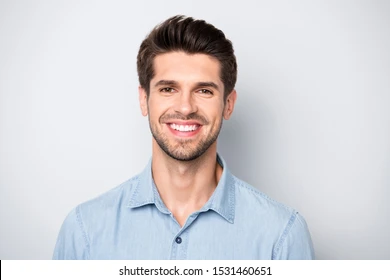

1/1 [==============================] - 0s 21ms/step
[[0.49811754 0.47740024]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')